In [63]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import jit,njit,float64,int32
import numba as nb
import pandas as pd
from derivative import dxdt

# Functions

In [89]:
def f(x, alpha_damage_propagation, disease_rate, t=None):
    return (1-x)*alpha_damage_propagation*x + disease_rate

def Runke_Kutta_Method(temporal_evolution:list, disease_rate):
    x = condicion_inicial                                        #Initial condition     
    frailty_index = np.empty((len(temporal_evolution)))
    for index, t in enumerate(temporal_evolution):
        frailty_index[index] = x
        k1 = h*f(x, alpha_damage_propagation, disease_rate, t=t)
        k2 = h*f(x+0.5*k1, alpha_damage_propagation, disease_rate, t=t +0.5*h)
        x += k2

    gompertz_law = mortality_rate*(frailty_index**(coupling_factor/alpha_damage_propagation))
    return frailty_index, gompertz_law, temporal_evolution

# Parameters

In [90]:
tiempo_vida_inicial = 20
tiempo_vida_maximo = 150            #Para que los resultados obtenidos se encuentren ligados a realidad biologica
pasos_integracion = tiempo_vida_maximo-  tiempo_vida_inicial         #Definicion de los pasos de integracion de algoritmo   #Tasa de propagacion de daño
h = (tiempo_vida_maximo-tiempo_vida_inicial)/pasos_integracion   

# Numerical Solution

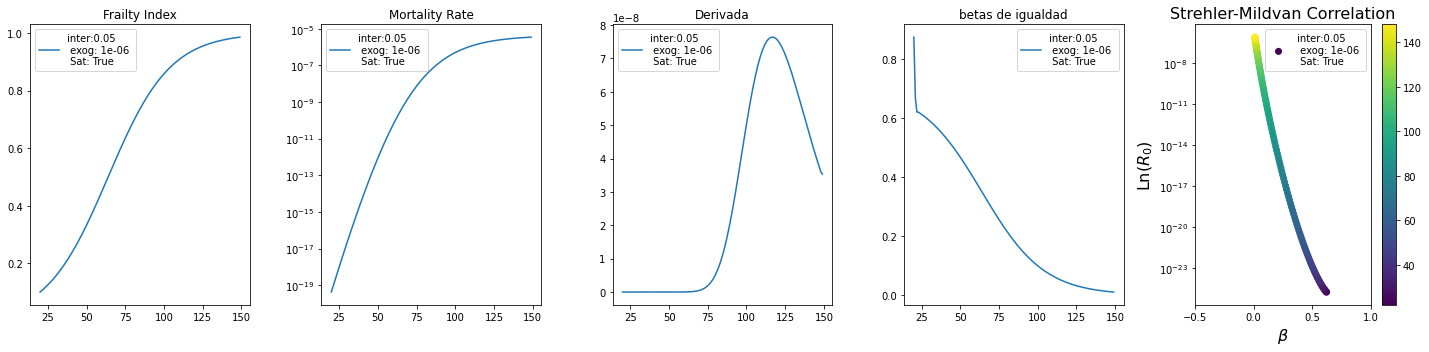

In [120]:
mortality_rate = 4.3*(10**(-6))     #Tasa de mortalidad #NO MODIFICA COMPORTAMIENTO LEY DE GOMPERTZ

disease_rate_steps = [0.000001]
condicion_inicial = 0.1
alpha_damage_propagation = 0.05

coupling_factor = 0.7            #Factor de acoplamiento entre frailty index y gompertz

temporal_evolution = np.arange(tiempo_vida_inicial,tiempo_vida_maximo,h) 
frailty_index_differential_equation,gompertz_law_differential_equation,temporal_evolution_differential_equation = Runke_Kutta_Method(temporal_evolution, disease_rate_steps[0])
valores_beta_R = np.empty((2), dtype = object)
temporal_evolution = temporal_evolution_differential_equation
data = gompertz_law_differential_equation
derivative_process = dxdt(data, temporal_evolution, kind="finite_difference", k=3)
beta_values = derivative_process/data
R_values = data/np.e**(beta_values*temporal_evolution)
valores_beta_R[0] = beta_values
valores_beta_R[1] = R_values

plt.figure(figsize=(20,5))

plt.subplot(1,5,1)
plt.title("Frailty Index")
plt.plot(temporal_evolution, frailty_index_differential_equation, label = f"inter:{alpha_damage_propagation} \n exog: {disease_rate_steps[0]} \n Sat: True")
plt.legend()

plt.subplot(1,5,2)
plt.title("Mortality Rate")
plt.plot(temporal_evolution, data, label = f"inter:{alpha_damage_propagation} \n exog: {disease_rate_steps[0]} \n Sat: True")
plt.yscale("log")
plt.legend()

plt.subplot(1,5,3)
plt.title("Derivada")
plt.plot(temporal_evolution, derivative_process, label = f"inter:{alpha_damage_propagation} \n exog: {disease_rate_steps[0]} \n Sat: True")
plt.legend()

plt.subplot(1,5,4)
plt.title("betas de igualdad")
plt.plot(temporal_evolution, beta_values, label = f"inter:{alpha_damage_propagation} \n exog: {disease_rate_steps[0]} \n Sat: True")
plt.legend()

plt.subplot(1,5,5)
plt.title(r"Strehler-Mildvan Correlation", fontsize = 16)
inicial = 2
final = -1
cmap = 'viridis'
plt.scatter(valores_beta_R[0][inicial:final], valores_beta_R[1][inicial:final], c=temporal_evolution[inicial:final], cmap=cmap, label = f"inter:{alpha_damage_propagation} \n exog: {disease_rate_steps[0]} \n Sat: True")
plt.colorbar()
plt.xlabel(r"$\beta$", fontsize = 16)
plt.ylabel(r"Ln($R_0$)", fontsize = 16)
plt.yscale("log")
plt.tight_layout()
plt.xlim(-0.5,1)
plt.legend()
plt.savefig(f"SM_correlation_modelo_2_alpha:{alpha_damage_propagation}_exog:{disease_rate_steps[0]}_beta:{coupling_factor}.jpg", dpi = 200)


In [287]:
mortality_rate = 4.3*(10**(-6))     #Tasa de mortalidad #NO MODIFICA COMPORTAMIENTO LEY DE GOMPERTZ

disease_rate_steps = [0.000001]
condicion_inicial = 0.1
alpha_damage_propagation = 0.09

coupling_factor = 0.7            #Factor de acoplamiento entre frailty index y gompertz

In [288]:
Y_collections = []
Y_collection2 = []

In [289]:
#Primero vamos a realizar la linea del modelo 4 el cual es el modelo de continuidad de beta y es sencilla

def f(x, alpha_damage_propagation, disease_rate, t=None):
    return alpha_damage_propagation*x + disease_rate

disease_rate_steps = [0.0]

temporal_evolution = np.arange(tiempo_vida_inicial,tiempo_vida_maximo,h) 
frailty_index_differential_equation,gompertz_law_differential_equation,temporal_evolution_differential_equation = Runke_Kutta_Method(temporal_evolution, disease_rate_steps[0])
valores_beta_R = np.empty((2), dtype = object)
temporal_evolution = temporal_evolution_differential_equation
data = gompertz_law_differential_equation
derivative_process = dxdt(data, temporal_evolution, kind="finite_difference", k=3)
beta_values = derivative_process/data

Y_collections.append(beta_values)


In [290]:
# vamos a realizar la linea del modelo 3 el cual es el modelo de continuidad de adicion de daño exogeno con diferentes valor de d

def f(x, alpha_damage_propagation, disease_rate, t=None):
    return alpha_damage_propagation*x + disease_rate


disease_rate_steps = array_valores = np.arange(0.000001, 0.005 + 0.00001, 0.00001)

for D in disease_rate_steps: 
    temporal_evolution = np.arange(tiempo_vida_inicial,tiempo_vida_maximo,h) 
    frailty_index_differential_equation,gompertz_law_differential_equation,temporal_evolution_differential_equation = Runke_Kutta_Method(temporal_evolution,D)
    valores_beta_R = np.empty((2), dtype = object)
    temporal_evolution = temporal_evolution_differential_equation
    data = gompertz_law_differential_equation
    derivative_process = dxdt(data, temporal_evolution, kind="finite_difference", k=3)
    beta_values = derivative_process/data

    Y_collections.append(beta_values)

In [291]:
# Vamos a realizar los de saturacion

# vamos a realizar la linea del modelo 3 el cual es el modelo de continuidad de adicion de daño exogeno con diferentes valor de d

def f(x, alpha_damage_propagation, disease_rate, t=None):
    return (1-x)*alpha_damage_propagation*x + disease_rate


disease_rate_steps = np.arange(0.000001, 0.005 + 0.00001, 0.00001)

for D in disease_rate_steps: 
    temporal_evolution = np.arange(tiempo_vida_inicial,tiempo_vida_maximo,h) 
    frailty_index_differential_equation,gompertz_law_differential_equation,temporal_evolution_differential_equation = Runke_Kutta_Method(temporal_evolution,D)
    valores_beta_R = np.empty((2), dtype = object)
    temporal_evolution = temporal_evolution_differential_equation
    data = gompertz_law_differential_equation
    derivative_process = dxdt(data, temporal_evolution, kind="finite_difference", k=3)
    beta_values = derivative_process/data

    Y_collection2.append(beta_values)

502it [00:00, 1880.11it/s]
501it [00:00, 1997.56it/s]


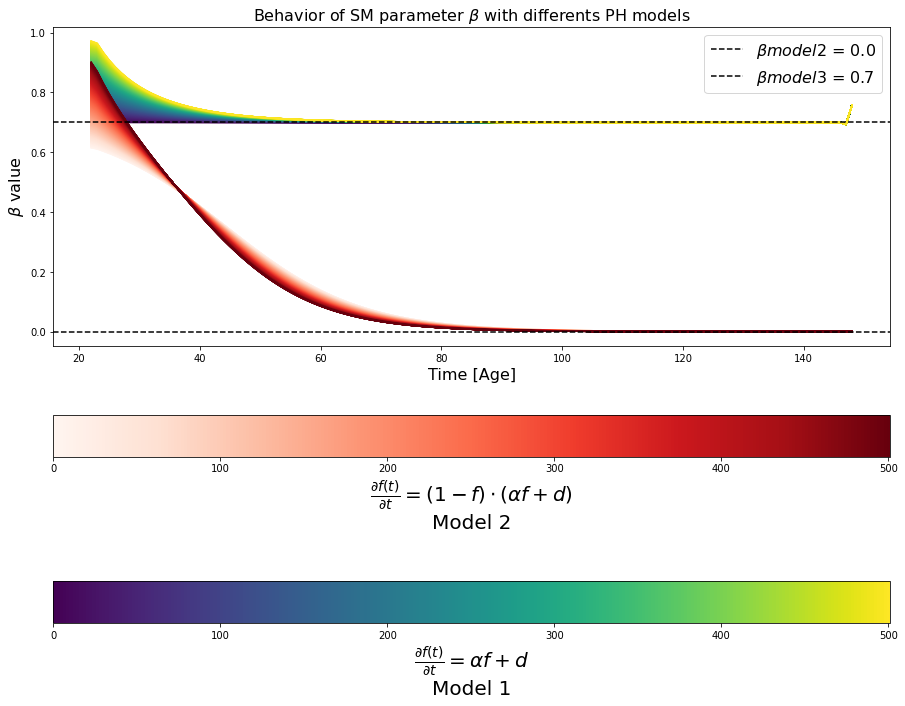

<Figure size 432x288 with 0 Axes>

In [332]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
X = temporal_evolution

A_values = np.arange(0, len(Y_collections), 1)  # Replace this with your parameter A values
A_values_2 = np.arange(0, len(Y_collection2), 1)  # Replace this with your parameter A values

# Create the plot with different colors for each line

fig, ax = plt.subplots(figsize=(15,12))

for Y, A in tqdm(zip(Y_collections, A_values)):
    # Create a separate colormap for each line
    colors = plt.cm.viridis(A_values / max(A_values))  # Normalize A_values between 0 and 1
    ax.plot(X[2:-1], Y[2:-1], color=colors[A]) 

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(A_values), vmax=max(A_values)))
sm.set_array([])  # Set an empty array to create the colorbar based on the colormap


for Y, A in tqdm(zip(Y_collection2, A_values)):
    # Create a separate colormap for each line

    colors2 = plt.cm.Reds(A_values / max(A_values))  # Normalize A_values between 0 and 1
    ax.plot(X[2:-1], Y[2:-1], color=colors2[A]) 

sm2 = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=min(A_values), vmax=max(A_values)))
sm2.set_array([])  # Set an empty array to create the colorbar based on the colormap


ax.axhline(y=0.0, color='black', linestyle='--', label=rf'$\beta model 2$ = 0.0')
ax.axhline(y=coupling_factor, color='black', linestyle='--', label=rf'$\beta model 3$ = {coupling_factor}')

cbar = plt.colorbar(sm, orientation = "horizontal")
cbar2 = plt.colorbar(sm2, orientation = "horizontal")

ax.set_xlabel(r'Time [Age]', fontsize=16)
ax.set_ylabel(r'$\beta$ value', fontsize=16)
ax.set_title(r"Behavior of SM parameter $\beta$ with differents PH models", fontsize= 16)
cbar.set_label(r"$\frac{\partial{f(t)}}{\partial{t}} = \alpha f + d$" + "\n" + "Model 1", fontsize=20)

cbar2.set_label(r"$\frac{\partial{f(t)}}{\partial{t}} = (1-f) \cdot (\alpha f + d)$" + "\n" + "Model 2", fontsize=20)


ax.legend(fontsize = 16)
plt.show()
plt.savefig("Behaviour_beta_differents_models.jpg", dpi = 1000)